In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import json
from pandas.io.json import json_normalize
from functools import reduce

In [2]:
def col_json_to_dict(df,cols):
    "Transform the json values inside a column into list of dictionaries"
    transformed_df = df
    for col in cols:
        transformed_df = transformed_df.assign(**{col: df[col].apply(json.loads)})
    return transformed_df

In [3]:
def col_dict_to_set(df,col,key):
    "Create a set from the values of the dictionaries give a key"
    get_set = lambda dict_list : set([dict_.get(key) for dict_ in dict_list])
    return df.assign(**{col: df[col].apply(get_set)})

In [4]:
def col_filter_dict_with_vals(df,col,field,values):
    "Filter dictionaries with specific values from a column with lists of dictionaries"
    filter_dicts = lambda dict_list: [dict_ for dict_ in dict_list if dict_.get(field) in values]
    return df.assign(**{col: df[col].apply(filter_dicts)})

In [5]:
credits_df = pd.read_csv("./data/tmdb_5000_credits.csv",sep=',', quotechar='"')
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies_df = pd.read_csv("./data/tmdb_5000_movies.csv",sep=',', quotechar='"')\
                .rename({"id":"movie_id"},axis=1)
movies_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
credits_df_cp = credits_df.copy()
movies_df_cp = movies_df.copy()

## Clean movies_df_cp

In [8]:
# movies with empty genre field
len(movies_df_cp[movies_df_cp.astype(str)['genres'] == '[]'])

28

In [9]:
# movies with empty production_companies field
len(movies_df_cp[movies_df_cp.astype(str)['production_companies'] == '[]'])

351

In [10]:
# movies with empty production_companies field
len(movies_df_cp[movies_df_cp.astype(str)['production_countries'] == '[]'])

174

In [11]:
# movies with empty production_companies field
len(movies_df_cp[movies_df_cp.astype(str)['spoken_languages'] == '[]'])

86

## Process movies df

In [12]:
pr_movies_df = movies_df_cp
len(pr_movies_df)

4803

In [13]:
pr_movies_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [14]:
# Transform json to list of dictionaries within cols
movies_df_json_cols = ['genres','production_companies','keywords','production_countries','spoken_languages']
cols_to_drop = ['homepage','overview','tagline','original_title']
key = 'name'
movie_id_col = 'movie_id'

pr_movies_df = col_json_to_dict(pr_movies_df,movies_df_json_cols)
for col in movies_df_json_cols :
    pr_movies_df = col_dict_to_set(pr_movies_df,col,key)
pr_movies_df = pr_movies_df.drop(columns = cols_to_drop)
pr_movies_df.head()

,budget,genres,movie_id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"{Fantasy, Science Fiction, Action, Adventure}",19995,"{romance, space colony, cgi, space war, tribe,...",en,150.437577,"{Twentieth Century Fox Film Corporation, Light...","{United States of America, United Kingdom}",2009-12-10,2787965087,162.0,"{English, Español}",Released,Avatar,7.2,11800
1,300000000,"{Fantasy, Action, Adventure}",285,"{drug abuse, exotic island, love of one's life...",en,139.082615,"{Second Mate Productions, Jerry Bruckheimer Fi...",{United States of America},2007-05-19,961000000,169.0,{English},Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"{Action, Adventure, Crime}",206647,"{based on novel, mi6, spy, sequel, british sec...",en,107.376788,"{Columbia Pictures, B24, Danjaq}","{United States of America, United Kingdom}",2015-10-26,880674609,148.0,"{Italiano, Deutsch, English, Español, Français}",Released,Spectre,6.3,4466
3,250000000,"{Drama, Thriller, Action, Crime}",49026,"{terrorist, batman, hostage drama, dc comics, ...",en,112.312950,"{DC Entertainment, Legendary Pictures, Syncopy...",{United States of America},2012-07-16,1084939099,165.0,{English},Released,The Dark Knight Rises,7.6,9106
4,260000000,"{Science Fiction, Action, Adventure}",49529,"{escape, 19th century, based on novel, martian...",en,43.926995,{Walt Disney Pictures},{United States of America},2012-03-07,284139100,132.0,{English},Released,John Carter,6.1,2124


## Process credits df

In [15]:
pr_credits_df = credits_df_cp
credits_df_json_cols = ['cast','crew']
key = 'name'
pr_credits_df = col_json_to_dict(pr_credits_df,credits_df_json_cols)
pr_credits_df = pr_credits_df.assign(actors = pr_credits_df[credits_df_json_cols[0]] )
for col in credits_df_json_cols:
    if col != "crew":
        pr_credits_df = col_dict_to_set(pr_credits_df,col,key)
crew_col = 'crew'
job_field = 'job'
values = ['Director']
# Filter dictionaries with Director as job
pr_credits_df = col_filter_dict_with_vals(pr_credits_df,crew_col,job_field,values)\
                    .rename({crew_col:values[0]})
pr_credits_df = col_dict_to_set(pr_credits_df,crew_col,key)
# Get actors col
# Only select main actors to reduce the size of the dataset
actors_col = 'actors'
order_field = 'order'
# Select the number of important actors
values = [0,1,2,3,4]
pr_credits_df = col_filter_dict_with_vals(pr_credits_df,actors_col,order_field,values)\
                    .rename({crew_col:values[0]})

get_value = lambda dict_: dict_.get(key)

pr_credits_df = pr_credits_df.explode(actors_col)
pr_credits_df = pr_credits_df[pr_credits_df[actors_col].notna()]
actors_series = pr_credits_df[actors_col]
pr_credits_df = pr_credits_df.assign(**{actors_col:pr_credits_df[actors_col].apply(get_value)})
# Remove actor from cast
actor_cast_col = 'actor_cast'
pr_credits_df = pr_credits_df.reset_index(drop=True)
remove_from_cast = lambda row: row[credits_df_json_cols[0]]-set({row[actors_col]})
pr_credits_df = pr_credits_df.assign(\
                **{credits_df_json_cols[0]:pr_credits_df.apply(remove_from_cast,axis=1)})\
                .drop(columns='title')
pr_credits_df.head()

,movie_id,cast,crew,actors
0,19995,"{Stuart Pollock, Gareth Ruck, James Patrick Pi...",{James Cameron},Sam Worthington
1,19995,"{Stuart Pollock, Gareth Ruck, James Patrick Pi...",{James Cameron},Zoe Saldana
2,19995,"{Stuart Pollock, Gareth Ruck, James Patrick Pi...",{James Cameron},Sigourney Weaver
3,19995,"{Stuart Pollock, Gareth Ruck, James Patrick Pi...",{James Cameron},Stephen Lang
4,19995,"{Stuart Pollock, Gareth Ruck, James Patrick Pi...",{James Cameron},Michelle Rodriguez


In [16]:
actor_cols = ['name','gender','order']
actors_df = json_normalize(actors_series)[actor_cols]
actors_df = actors_df\
            .rename(columns ={actor_cols[0]:actors_col})\
            .groupby(actors_col)\
            .aggregate({actor_cols[1]:max,actor_cols[2]:list})\
            .reset_index()\
            .reset_index()\
            .rename(columns={'index':'actor_id'})
actors_df

,actor_id,actors,gender,order
0,0,Larry Mullen Jr.,2,[4]
1,1,"""Weird Al"" Yankovic",0,[0]
2,2,50 Cent,2,"[4, 2, 4, 0, 4]"
3,3,A.D. Johnson,0,[4]
4,4,A.J. Buckley,2,"[1, 3, 4]"
...,...,...,...,...
9177,9177,Óscar Jaenada,2,[1]
9178,9178,Đỗ Thị Hải Yến,1,[2]
9179,9179,Špela Colja,0,[3]
9180,9180,Юлия Снигирь,1,"[4, 2]"


In [17]:
actors_credits_df = pr_credits_df.merge(actors_df,right_on=actors_col,left_on=actors_col,how = 'inner')
actors_credits_df.head(20)

,movie_id,cast,crew,actors,actor_id,gender,order
0,19995,"{Stuart Pollock, Gareth Ruck, James Patrick Pi...",{James Cameron},Sam Worthington,7735,2,"[0, 1, 0, 0, 4, 0, 1, 4]"
1,534,"{Anton Yelchin, Christian Bale, Common, Michae...",{McG},Sam Worthington,7735,2,"[0, 1, 0, 0, 4, 0, 1, 4]"
2,57165,"{Martin Bayfield, Kett Turton, Lily James, Ral...",{Jonathan Liebesman},Sam Worthington,7735,2,"[0, 1, 0, 0, 4, 0, 1, 4]"
3,18823,"{Ian Whyte, Katherine Loeppky, Alexa Davalos, ...",{Louis Leterrier},Sam Worthington,7735,2,"[0, 1, 0, 0, 4, 0, 1, 4]"
4,253412,"{Lucy Newman-Williams, Naoko Mori, Charlotte B...",{Baltasar Kormákur},Sam Worthington,7735,2,"[0, 1, 0, 0, 4, 0, 1, 4]"
5,49527,"{Frank Pando, Geoffrey Cantor, Gerry Vichi, Gé...",{Asger Leth},Sam Worthington,7735,2,"[0, 1, 0, 0, 4, 0, 1, 4]"
6,144336,"{Gary Grubbs, B.J. Winfrey, Everton Lawrence, ...",{David Ayer},Sam Worthington,7735,2,"[0, 1, 0, 0, 4, 0, 1, 4]"
7,48289,"{Adar Beck, Tom Wilkinson, Marton Csokas, Jesp...",{John Madden},Sam Worthington,7735,2,"[0, 1, 0, 0, 4, 0, 1, 4]"
8,19995,"{Stuart Pollock, Gareth Ruck, James Patrick Pi...",{James Cameron},Zoe Saldana,9158,1,"[1, 2, 4, 1, 2, 0, 2, 4, 1, 1, 1, 1, 1, 4, 1]"
9,54138,"{Anton Yelchin, Cynthia Addai-Robinson, Matthe...",{J.J. Abrams},Zoe Saldana,9158,1,"[1, 2, 4, 1, 2, 0, 2, 4, 1, 1, 1, 1, 1, 4, 1]"


In [18]:
movie_id_col = 'movie_id'
new_movie_id_col = 'new_movie_id'
actors_movies_credits_df = actors_credits_df.merge(pr_movies_df,\
                                                   right_on=movie_id_col,\
                                                   left_on=movie_id_col,\
                                                   how="inner")
# Set new movie ids
unique_movies_df = pr_movies_df[movie_id_col]\
                    .to_frame()\
                    .drop_duplicates()\
                    .reset_index()\
                    .rename(columns={"index":new_movie_id_col})
actors_movies_credits_df = actors_movies_credits_df.merge(unique_movies_df,right_on=movie_id_col,left_on=movie_id_col,how='inner')\
                            .drop(columns=movie_id_col)\
                            .rename(columns={new_movie_id_col:movie_id_col})

actors_movies_credits_df.head()

,cast,crew,actors,actor_id,gender,order,budget,genres,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,movie_id
0,"{Stuart Pollock, Gareth Ruck, James Patrick Pi...",{James Cameron},Sam Worthington,7735,2,"[0, 1, 0, 0, 4, 0, 1, 4]",237000000,"{Fantasy, Science Fiction, Action, Adventure}","{romance, space colony, cgi, space war, tribe,...",en,...,"{United States of America, United Kingdom}",2009-12-10,2787965087,162.0,"{English, Español}",Released,Avatar,7.2,11800,0
1,"{Stuart Pollock, Gareth Ruck, James Patrick Pi...",{James Cameron},Zoe Saldana,9158,1,"[1, 2, 4, 1, 2, 0, 2, 4, 1, 1, 1, 1, 1, 4, 1]",237000000,"{Fantasy, Science Fiction, Action, Adventure}","{romance, space colony, cgi, space war, tribe,...",en,...,"{United States of America, United Kingdom}",2009-12-10,2787965087,162.0,"{English, Español}",Released,Avatar,7.2,11800,0
2,"{Stuart Pollock, Gareth Ruck, James Patrick Pi...",{James Cameron},Sigourney Weaver,8051,1,"[2, 4, 0, 0, 1, 3, 0, 3, 0, 0, 0, 1, 2, 2, 0, ...",237000000,"{Fantasy, Science Fiction, Action, Adventure}","{romance, space colony, cgi, space war, tribe,...",en,...,"{United States of America, United Kingdom}",2009-12-10,2787965087,162.0,"{English, Español}",Released,Avatar,7.2,11800,0
3,"{Stuart Pollock, Gareth Ruck, James Patrick Pi...",{James Cameron},Stephen Lang,8189,2,"[3, 0, 3, 4, 4, 0]",237000000,"{Fantasy, Science Fiction, Action, Adventure}","{romance, space colony, cgi, space war, tribe,...",en,...,"{United States of America, United Kingdom}",2009-12-10,2787965087,162.0,"{English, Español}",Released,Avatar,7.2,11800,0
4,"{Stuart Pollock, Gareth Ruck, James Patrick Pi...",{James Cameron},Michelle Rodriguez,6225,1,"[4, 3, 2, 2, 2, 1, 2, 2, 3, 1]",237000000,"{Fantasy, Science Fiction, Action, Adventure}","{romance, space colony, cgi, space war, tribe,...",en,...,"{United States of America, United Kingdom}",2009-12-10,2787965087,162.0,"{English, Español}",Released,Avatar,7.2,11800,0


In [19]:
aux_movies_df = unique_movies_df.merge(pr_movies_df[['movie_id','title']].drop_duplicates(),right_on='movie_id',left_on='movie_id')
aux_movies_df.head()

,new_movie_id,movie_id,title
0,0,19995,Avatar
1,1,285,Pirates of the Caribbean: At World's End
2,2,206647,Spectre
3,3,49026,The Dark Knight Rises
4,4,49529,John Carter


In [20]:
actors_movies_credits_df.columns

Index(['cast', 'crew', 'actors', 'actor_id', 'gender', 'order', 'budget',
       'genres', 'keywords', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'movie_id'],
      dtype='object')

In [21]:
len(actors_movies_credits_df)

23268

In [22]:
get_union = lambda s: reduce(set.union,s) 
actor_id_col = "actor_id"
actors_agg_df = actors_movies_credits_df.groupby(actors_col).aggregate(\
                 {"movie_id":set,"cast":get_union,"crew":get_union,"actor_id":max,"gender":max,"budget":"mean",\
                  "genres":get_union,"keywords":get_union,"original_language":set,"popularity": "mean",\
                  "production_companies":get_union,"production_countries":get_union,"release_date":list,\
                  "revenue":"mean","runtime":sum,"spoken_languages":get_union,"status":list,"title":set,\
                  "vote_average":"mean","vote_count":"mean"})\
                  .set_index(actor_id_col)
actors_agg_df.head()

,movie_id,cast,crew,gender,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
actor_id,,,,,,,,,,,,,,,,,,,
0,{2591},"{Bono, Adam Clayton, The Edge}","{Catherine Owens, Mark Pellington}",2,1.500000e+07,"{Music, Documentary}",{},{en},0.335195,"{3ality Digital Entertainment, National Geogra...",{United States of America},[2007-05-19],2.273084e+07,85.0,{English},[Released],{U2 3D},6.700000,10.0
1,{3619},"{Michael Richards, Emo Philips, David Bowe, Vi...",{Jay Levey},0,5.000000e+06,{Comedy},"{cult film, tv star, tv station, satire, music...",{en},4.070044,"{Orion Pictures, Cinecorp}",{United States of America},[1989-07-21],0.000000e+00,97.0,{English},[Released],{UHF},6.700000,89.0
2,"{609, 1232, 1233, 761, 1597}","{Malachy McCourt, Christian Stokes, Anastasia ...","{Jim Sheridan, Antoine Fuqua, Mikael Håfström,...",2,4.400000e+07,"{Drama, Crime, Comedy, Action, Thriller, Romance}","{escape, rapper, prison escape, prison, musica...",{en},32.720009,"{Atmosphere Entertainment MM, Goldcrest Pictur...",{United States of America},"[2015-06-15, 2010-01-12, 2005-11-09, 2013-10-0...",7.860544e+07,558.0,"{Український, العربية, اردو, Deutsch, Español,...","[Released, Released, Released, Released, Relea...","{Morning Glory, Righteous Kill, Southpaw, Esca...",6.460000,939.8
3,{3163},"{Harry Anthony Shelley, Matthew Albrecht, Aman...",{Joseph Kahn},0,1.000000e+07,"{Science Fiction, Horror, Comedy}","{horror spoof, high school, murder, slasher}",{en},10.424596,{Detention Films},{United States of America},[2011-03-16],0.000000e+00,93.0,{English},[Released],{Detention},5.700000,129.0
4,"{4034, 4054, 4375}","{Ron Roggé, Peter Wingfield, Louise Fletcher, ...","{John Murlowski, Karen Moncrieff, Michael Land...",2,3.333333e+05,"{Drama, Family, Comedy}","{christianity, woman director, appalachia, con...",{en},1.224799,{},{United States of America},"[2002-01-11, 2007-02-09, 2010-12-01]",1.546667e+05,298.0,"{Português, English}","[Released, Released, Released]","{The Last Sin Eater, Christmas Mail, Blue Car}",5.966667,13.0


## Build graph

In [23]:
nodes_df = actors_agg_df[['cast','crew','production_companies','genres','movie_id']]
nodes_df.head()

,cast,crew,production_companies,genres,movie_id
actor_id,,,,,
0,"{Bono, Adam Clayton, The Edge}","{Catherine Owens, Mark Pellington}","{3ality Digital Entertainment, National Geogra...","{Music, Documentary}",{2591}
1,"{Michael Richards, Emo Philips, David Bowe, Vi...",{Jay Levey},"{Orion Pictures, Cinecorp}",{Comedy},{3619}
2,"{Malachy McCourt, Christian Stokes, Anastasia ...","{Jim Sheridan, Antoine Fuqua, Mikael Håfström,...","{Atmosphere Entertainment MM, Goldcrest Pictur...","{Drama, Crime, Comedy, Action, Thriller, Romance}","{609, 1232, 1233, 761, 1597}"
3,"{Harry Anthony Shelley, Matthew Albrecht, Aman...",{Joseph Kahn},{Detention Films},"{Science Fiction, Horror, Comedy}",{3163}
4,"{Ron Roggé, Peter Wingfield, Louise Fletcher, ...","{John Murlowski, Karen Moncrieff, Michael Land...",{},"{Drama, Family, Comedy}","{4034, 4054, 4375}"


In [24]:
dict_actor_id = dict(zip(actors_df[actors_col],actors_df[actor_id_col]))
dict_id_actor = dict(zip(actors_df[actor_id_col],actors_df[actors_col]))

## Get cast intersecctions length mat

In [25]:
import timeit

def get_intersections_length_adj_mat(col):
    "Get the intersecction length of the set of each entry with the set of every other entry in the column"
    start = timeit.default_timer()
    adj = np.zeros((col.shape[0],col.shape[0]))
    for (i,set_row) in enumerate (col):
        for(j,set_col) in enumerate (col):
            try:
                adj[i,j] = len(set_row.intersection(set_col))
            except AttributeError:
                adj[i,j] = 0
    stop = timeit.default_timer()
    print('Time: ', stop - start)
    return adj

In [26]:
def get_unions_length_adj_mat(col):
    "Get the unions length of the set of each entry with the set of every other entry in the column"
    start = timeit.default_timer()
    adj = np.zeros((col.shape[0],col.shape[0]))
    for (i,set_row) in enumerate(col):
        for(j,set_col) in enumerate(col):
            try:
                adj[i,j] = len(set_row.union(set_col))
            except AttributeError:
                adj[i,j] = 0
    stop = timeit.default_timer()
    print('Time: ', stop - start)
    return adj

## Get cast intersections

In [27]:
col = 'cast'
cast_col = nodes_df[col]
cast_adj_raw = get_intersections_length_adj_mat(cast_col)
cast_adj_diag = np.diag(np.diag(cast_adj_raw))
cast_adj = cast_adj_raw - cast_adj_diag

Time:  99.77760400000001


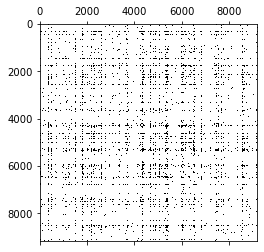

In [28]:
plt.spy(cast_adj)

In [29]:
np.save('cast_adj',cast_adj)

## Load cast adjacency matrix

In [30]:
cast_adj = np.load('cast_adj.npy')

In [31]:
cast_adj.shape

(9182, 9182)

In [32]:
node_degree = cast_adj.sum(axis=0)

In [33]:
most_connected_actors_id = np.argsort(- node_degree)[:20]
most_connected_actors = [dict_id_actor.get(id_) for id_ in most_connected_actors_id]
actors_df[actors_df[actor_id_col].isin(most_connected_actors_id)]
print(most_connected_actors)

['Robert De Niro', 'Samuel L. Jackson', 'Bruce Willis', 'Matt Damon', 'Mark Wahlberg', 'Owen Wilson', 'Gary Oldman', 'Morgan Freeman', 'Ben Affleck', 'Leonardo DiCaprio', 'Brad Pitt', 'Johnny Depp', 'Denzel Washington', 'Tom Cruise', 'Ben Stiller', 'Nicolas Cage', 'George Clooney', 'Scarlett Johansson', 'Tom Hanks', 'Christian Bale']


## Get cast unions length mat

In [34]:
col = 'cast'
cast_col = nodes_df[col]
cast_adj_union_raw = get_unions_length_adj_mat(cast_col)
cast_adj_union_diag = np.diag(np.diag(cast_adj_union_raw))
cast_adj_union = cast_adj_union_raw - cast_adj_union_diag

Time:  341.756371


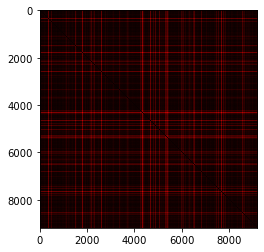

In [35]:
plt.imshow(cast_adj_union, cmap='hot', interpolation='none')

In [36]:
np.save('cast_adj_union',cast_adj_union)

## Get movies intersections length mat

In [37]:
col = 'movie_id'
movie_col = nodes_df[col]
movie_adj_raw = get_intersections_length_adj_mat(movie_col)
movie_adj_diag = np.diag(np.diag(movie_adj_raw))
movie_adj = movie_adj_raw - movie_adj_diag

Time:  41.06919609999994


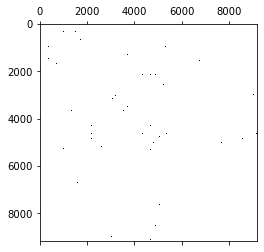

In [38]:
plt.spy(movie_adj)

In [39]:
np.save('movie_adj',movie_adj)

## Get movies union length mat

In [40]:
col = 'movie_id'
movie_col = nodes_df[col]
movie_adj_union_raw = get_unions_length_adj_mat(movie_col)
movie_adj_union_diag = np.diag(np.diag(movie_adj_union_raw))
movie_adj_union = movie_adj_union_raw - movie_adj_union_diag

Time:  53.02801180000006


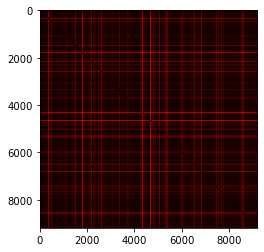

In [41]:
plt.imshow(movie_adj_union, cmap='hot', interpolation='none')

In [42]:
np.save('movie_adj_union',movie_adj_union)

## Get directors intersections lenght mat

In [43]:
col = 'crew'
crew_col = nodes_df[col]
crew_adj_raw = get_intersections_length_adj_mat(crew_col)
crew_adj_diag = np.diag(np.diag(crew_adj_raw))
crew_adj = crew_adj_raw - crew_adj_diag

Time:  45.97264409999991


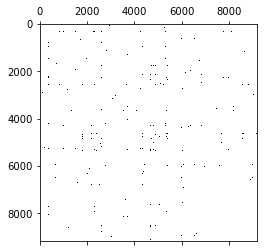

In [44]:
plt.spy(crew_adj)

In [45]:
np.save('crew_adj',crew_adj)

## Get directors union length mat

In [46]:
col = 'crew'
crew_col = nodes_df[col]
crew_adj_union_raw = get_unions_length_adj_mat(crew_col)
crew_adj_union_diag = np.diag(np.diag(crew_adj_union_raw))
crew_adj_union = crew_adj_union_raw - crew_adj_union_diag

Time:  61.765833799999996


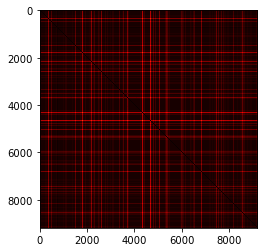

In [47]:
plt.imshow(crew_adj_union, cmap='hot', interpolation='none')

In [48]:
np.save('crew_adj_union',crew_adj_union)

## Get production companies intersections length mat

In [49]:
col = 'production_companies'
prod_comp_col = nodes_df[col]
prod_comp_adj_raw = get_intersections_length_adj_mat(prod_comp_col)
prod_comp_adj_diag = np.diag(np.diag(prod_comp_adj_raw))
prod_comp_adj = prod_comp_adj_raw - prod_comp_adj_diag

Time:  49.472363599999994


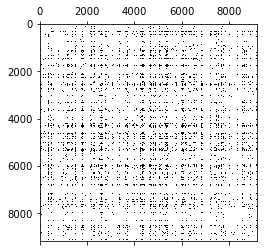

In [50]:
plt.spy(prod_comp_adj)

In [51]:
np.save('prod_comp_adj',prod_comp_adj)

## Get production companies unions length mat

In [52]:
col = 'production_companies'
prod_comp_col = nodes_df[col]
prod_comp_adj_union_raw = get_unions_length_adj_mat(prod_comp_col)
prod_comp_adj_union_diag = np.diag(np.diag(prod_comp_adj_union_raw))
prod_comp_adj_union = prod_comp_adj_union_raw - prod_comp_adj_union_diag

Time:  82.38180890000001


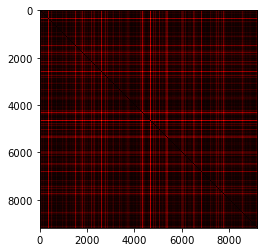

In [53]:
plt.imshow(prod_comp_adj_union, cmap='hot', interpolation='none')

In [54]:
np.save('prod_comp_adj_union',prod_comp_adj_union)

## Get genres intersections length mat

In [55]:
col = 'genres'
genres_col = nodes_df[col]
genres_adj_raw = get_intersections_length_adj_mat(genres_col)
genres_adj_diag = np.diag(np.diag(genres_adj_raw))
genres_adj = genres_adj_raw - genres_adj_diag

Time:  72.76547659999994


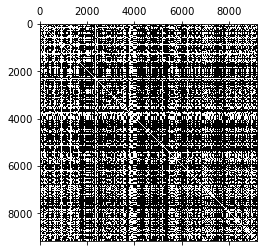

In [56]:
plt.spy(genres_adj)

In [57]:
np.save('genres_adj',genres_adj)

## Get genres unions length mat

In [58]:
col = 'genres'
genres_col = nodes_df[col]
genres_adj_union_raw = get_unions_length_adj_mat(genres_col)
genres_adj_union_diag = np.diag(np.diag(genres_adj_union_raw))
genres_adj_union = genres_adj_union_raw - genres_adj_union_diag

Time:  65.63656919999994


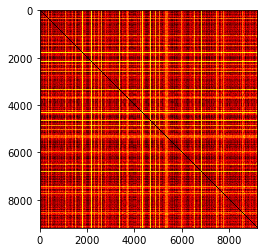

In [59]:
plt.imshow(genres_adj_union, cmap='hot', interpolation='none')

In [60]:
np.save('genres_adj_union',genres_adj_union)

## Aggregated adjacency matrix

In [61]:
agg_adj = np.divide((0.3*cast_adj + 0.3 * movie_adj + 0.2*crew_adj + 0.1 * genres_adj + 0.1 * prod_comp_adj),\
          (0.3*cast_adj_union + 0.3 * movie_adj_union + 0.2* crew_adj_union + 0.1*genres_adj_union + 0.1 * prod_comp_adj_union))
agg_adj = np.where(np.isnan(agg_adj),0,agg_adj)
np.sum(agg_adj)

C:\Users\AndresMontero\.conda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


472528.91617635224

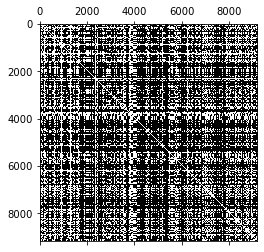

In [62]:
plt.spy(agg_adj)

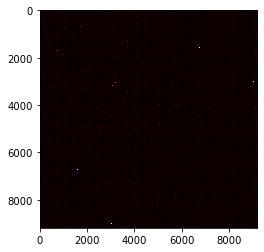

In [63]:
plt.imshow(agg_adj, cmap='hot', interpolation='none')

In [64]:
np.min(agg_adj)

0.0

In [65]:
np.max(agg_adj)

0.9850374064837905

In [66]:
np.save('agg_adj',agg_adj)

In [ ]:
np.load('agg_adj.npy')

## Tests

### Test consistency of data

In [67]:
dict_actor_id.get("Sam Worthington")

7735

In [68]:
actors_df[actors_df["actors"]=="Adriana Barraza"]

,actor_id,actors,gender,order
94,94,Adriana Barraza,1,"[4, 0]"


In [69]:
dict_actor_id.get("Andreas Berg")

In [70]:
actors_df[actors_df['actor_id']==1000]

,actor_id,actors,gender,order
1000,1000,Bonnie Hunt,1,"[2, 3, 3, 2, 4, 1, 2, 1]"


In [71]:
nodes_df.loc[0,'cast']

{'Adam Clayton', 'Bono', 'The Edge'}

In [72]:
# Test number of actors
len(np.unique(actors_agg_df.index.values))

9182

In [73]:
actors_agg_df

,movie_id,cast,crew,gender,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
actor_id,,,,,,,,,,,,,,,,,,,
0,{2591},"{Bono, Adam Clayton, The Edge}","{Catherine Owens, Mark Pellington}",2,1.500000e+07,"{Music, Documentary}",{},{en},0.335195,"{3ality Digital Entertainment, National Geogra...",{United States of America},[2007-05-19],2.273084e+07,85.0,{English},[Released],{U2 3D},6.700000,10.0
1,{3619},"{Michael Richards, Emo Philips, David Bowe, Vi...",{Jay Levey},0,5.000000e+06,{Comedy},"{cult film, tv star, tv station, satire, music...",{en},4.070044,"{Orion Pictures, Cinecorp}",{United States of America},[1989-07-21],0.000000e+00,97.0,{English},[Released],{UHF},6.700000,89.0
2,"{609, 1232, 1233, 761, 1597}","{Malachy McCourt, Christian Stokes, Anastasia ...","{Jim Sheridan, Antoine Fuqua, Mikael Håfström,...",2,4.400000e+07,"{Drama, Crime, Comedy, Action, Thriller, Romance}","{escape, rapper, prison escape, prison, musica...",{en},32.720009,"{Atmosphere Entertainment MM, Goldcrest Pictur...",{United States of America},"[2015-06-15, 2010-01-12, 2005-11-09, 2013-10-0...",7.860544e+07,558.0,"{Український, العربية, اردو, Deutsch, Español,...","[Released, Released, Released, Released, Relea...","{Morning Glory, Righteous Kill, Southpaw, Esca...",6.460000,939.8
3,{3163},"{Harry Anthony Shelley, Matthew Albrecht, Aman...",{Joseph Kahn},0,1.000000e+07,"{Science Fiction, Horror, Comedy}","{horror spoof, high school, murder, slasher}",{en},10.424596,{Detention Films},{United States of America},[2011-03-16],0.000000e+00,93.0,{English},[Released],{Detention},5.700000,129.0
4,"{4034, 4054, 4375}","{Ron Roggé, Peter Wingfield, Louise Fletcher, ...","{John Murlowski, Karen Moncrieff, Michael Land...",2,3.333333e+05,"{Drama, Family, Comedy}","{christianity, woman director, appalachia, con...",{en},1.224799,{},{United States of America},"[2002-01-11, 2007-02-09, 2010-12-01]",1.546667e+05,298.0,"{Português, English}","[Released, Released, Released]","{The Last Sin Eater, Christmas Mail, Blue Car}",5.966667,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9177,{2742},"{Janelle Bailey, Angelo Josue Lozano Corzo, Av...",{Jaume Collet-Serra},2,1.700000e+07,"{Drama, Horror, Thriller}","{mexico, young woman, survival, animal attack,...",{en},60.829621,"{Columbia Pictures, Weimaraner Republic Pictur...",{United States of America},[2016-06-24],1.191008e+08,86.0,{English},[Released],{The Shallows},6.200000,1567.0
9178,{2203},"{Susan Parry, Jeff Truman, Lucia Noyce, Askar ...",{Phillip Noyce},1,3.000000e+07,"{Drama, Thriller, Action, Romance}","{saigon, terror, lover (female), journalist, i...",{en},5.133744,"{Miramax Films, Intermedia Films, Mirage Enter...",{United States of America},[2002-11-22],2.767412e+07,101.0,"{Français, Tiếng Việt, English}",[Released],{The Quiet American},6.400000,81.0
9179,{4510},"{Lena Capuder, Ana Dolinar, Andrej Nahtigal, K...",{Blaž Završnik},0,0.000000e+00,"{Drama, Comedy}","{pornography, teenager, love, death, sex}",{sl},0.061248,"{Televizija Slovenija, Perfo Production}",{Slovenia},[2015-09-17],0.000000e+00,83.0,"{Slovenščina, English}",[Released],{Juliet and Alfa Romeo},6.000000,1.0


In [74]:
test_movie_id = actors_agg_df.loc[dict_actor_id.get("Sam Worthington")]["movie_id"]
test_movie_id

{0, 43, 132, 206, 671, 1146, 1448, 2147}

In [75]:
test_movies_df = unique_movies_df[unique_movies_df[new_movie_id_col].isin(test_movie_id)]
test_movies_df = test_movies_df.merge(pr_movies_df,right_on=movie_id_col,left_on=movie_id_col)
test_movies_df[[movie_id_col,new_movie_id_col,'title']]

,movie_id,new_movie_id,title
0,19995,0,Avatar
1,534,43,Terminator Salvation
2,57165,132,Wrath of the Titans
3,18823,206,Clash of the Titans
4,253412,671,Everest
5,49527,1146,Man on a Ledge
6,144336,1448,Sabotage
7,48289,2147,The Debt


In [76]:
"Sam Worthington" in pr_credits_df.loc[0,'cast']

False

In [77]:
pr_credits_df.loc[0]

movie_id                                                19995
cast        {Stuart Pollock, Gareth Ruck, James Patrick Pi...
crew                                          {James Cameron}
actors                                        Sam Worthington
Name: 0, dtype: object